Goal of this notebook: check the plane wave implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

simulation_params = {'c': 1.,
                     'dx': 0.1,
                     'dt': 0.01,
                     'shape': (601, 301)}


def _make_grid():
    """Creates X, Y simulation grid defined by sim parameters."""
    N, M = simulation_params['shape']
    dx = simulation_params['dx']
    dy = dx
    x = np.arange(0, N) * dx
    y = np.arange(0, M) * dy
    X, Y = np.meshgrid(x, y, indexing='ij')  # indexing='ij' is used to keep the N, M aspect
    return X, Y


# inputs
k = [1., 0.]
point_x0 = [30., 15.]
n_wavelengths=1
maxdist=5.
decay=.5

X, Y = _make_grid()
celerity = simulation_params['c']
dx = simulation_params['dx']
dt = simulation_params['dt']

kx, ky = k
x0, y0 = point_x0

magnitude_k = np.sqrt(kx ** 2 + ky ** 2)
omega = magnitude_k * celerity
wavelength = 2 * np.pi / magnitude_k
nx, ny = kx / magnitude_k, ky / magnitude_k  # unit vector

def make_envelope3(x0, y0):
    """Envelope orthognal to propagation direction, smoothed exponentially around the edges."""
    nnx, nny = -ny, nx
    dist = np.abs(nnx * (X - x0) + nny * (Y - y0))
    env = np.ones_like(dist)
    env[dist >= maxdist] *= np.exp(- (dist[dist >= maxdist] - maxdist) * decay)
    return env

def make_envelope4(x0, y0):
    """Envelope along propagation direction, as a number of wavelengths."""
    dist = np.abs(kx * (X - x0) + ky * (Y - y0))
    env = np.ones_like(dist)
    env[dist >= np.pi * n_wavelengths] *= 0. #np.exp(- (dist[dist >= np.pi * n_wavelengths] - np.pi * n_wavelengths) * decay)
    return env

phase0 = kx * (X - x0) + ky * (Y - y0) - np.pi / 2.
cos_phase0 = np.cos(phase0)
env3 = make_envelope3(x0, y0)
env4 = make_envelope4(x0, y0)
u0 = np.cos(phase0) * make_envelope3(x0, y0) * make_envelope4(x0, y0)

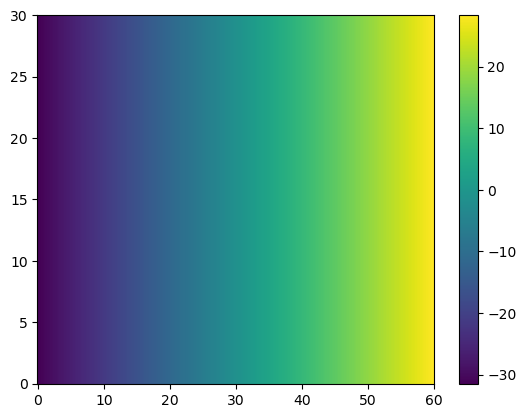

In [2]:
fig, ax = plt.subplots()
m = ax.pcolormesh(X, Y, phase0)
plt.colorbar(m)

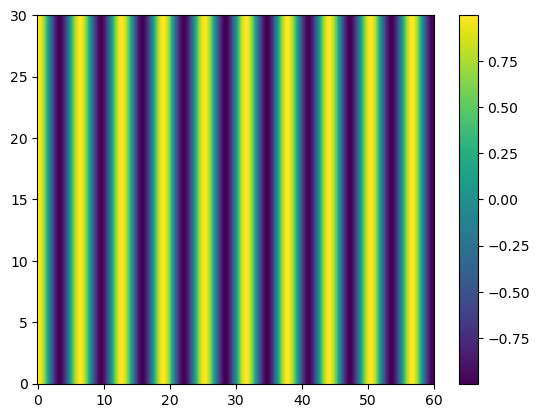

In [3]:
fig, ax = plt.subplots()
m = ax.pcolormesh(X, Y, cos_phase0)
plt.colorbar(m)

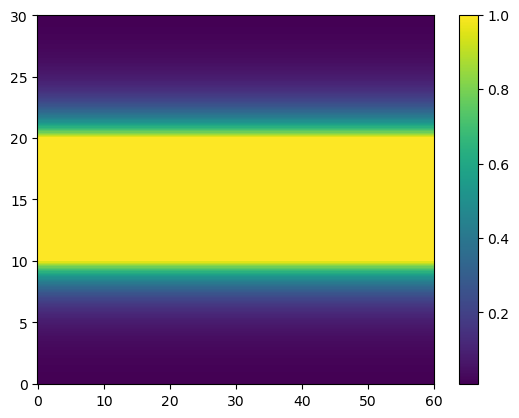

In [4]:
fig, ax = plt.subplots()
m = ax.pcolormesh(X, Y, env3)
plt.colorbar(m)

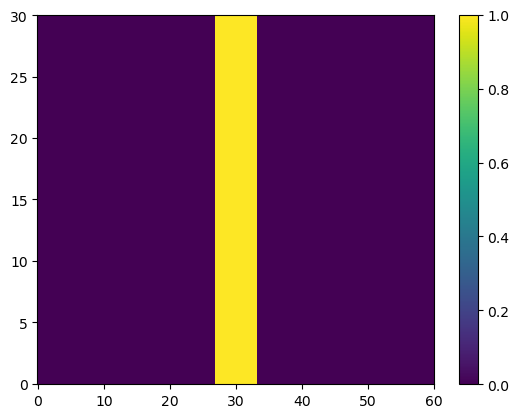

In [5]:
fig, ax = plt.subplots()
m = ax.pcolormesh(X, Y, env4)
plt.colorbar(m)

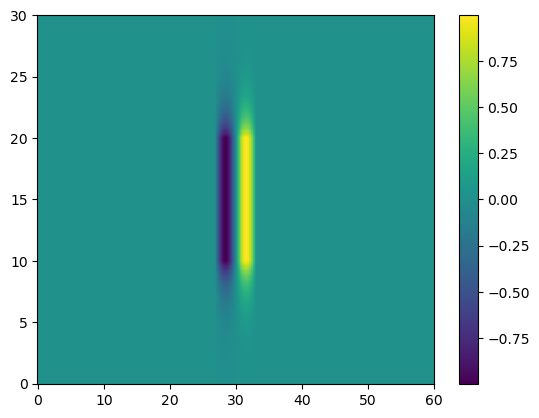

In [6]:
fig, ax = plt.subplots()
m = ax.pcolormesh(X, Y, u0)
plt.colorbar(m)